# Анализ трендов потребительского спроса

## Оглавление:
- [Цель_проекта](#Цель_проекта)
- [Очистка_данных](#Очистка_данных)
- [Анализ_данных](#Анализ_данных)
- [Вывод](#Вывод)

## <u>Цель_проекта</u>
<i> <p style="font-size:20px;"> Увеличение прибыли и улучшение удовлетворенности клиентов через целевую оптимизацию ассортимента и маркетинговых стратегий, основываясь на анализе покупательского поведения и предпочтений разных групп клиентов.</i>

   
   
## <u>Основные направления:</u>

<u><p style="font-size:20px;"> 1. Разработка персонализированных маркетинговых кампаний:</u>
<p style="font-size:18px;"><i>Использование данных о предпочтениях покупателей для создания целевых маркетинговых акций, нацеленных на увеличение продаж в ключевых категориях "Мода", "Спорт" и "Здоровье и уход" в соответствии с гендерными и временными предпочтениями.</span></i>

<u><p style="font-size:20px;"> 2. Оптимизация ассортимента:</u>
<p style="font-size:18px;"><i>Переоценка и корректировка ассортимента с акцентом на увеличение доли высокомаржинальных товаров и сокращение менее прибыльных позиций, особенно в категориях с низкой поштучной прибылью.</span></i>

<u><p style="font-size:20px;"> 3. Усиление послепродажной поддержки:</u>
<p style="font-size:18px;"><i>Улучшение качества послепродажного обслуживания, в частности в сегменте "Электроника", для повышения удовлетворенности клиентов и их лояльности к бренду.</span></i>

<u><p style="font-size:20px;"> 4. Инвестиции в технологические улучшения:</u>
<p style="font-size:18px;"><i>Внедрение передовых POS-терминальных технологий для оптимизации процессов оплаты, что способствует сокращению времени ожидания и улучшению общего опыта покупателя.</span></i>

## <u>Ожидаемые результаты:</u>

<p style="font-size:18px;"><i>- Значительное увеличение продаж и общей прибыльности за счет более целенаправленного ассортимента и маркетинга.</i> </p>
<p style="font-size:18px;"><i>- Улучшение удовлетворенности и лояльности клиентов благодаря повышенному качеству обслуживания и удобству покупок.</i> </p>
<p style="font-size:18px;"><i>- Укрепление позиций на рынке и повышение конкурентоспособности компании. </i> </p>

## <u>Очистка_данных</u>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('supermarket_sales.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### <i> Проверяем на Null-значения </i>

In [4]:
print(df.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


<i> <p style="font-size:20px;"> Так как пропусков в данных нет - переходим к исключению столбцов, которые не приносят значимого вклада в аналитический процесс </i> </p>

In [5]:
df1 = df.copy()

In [6]:
df1.drop('Invoice ID', axis = 1, inplace = True)
df1.drop('Branch', axis = 1, inplace = True)

In [7]:
df1

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City                     1000 non-null   object 
 1   Customer type            1000 non-null   object 
 2   Gender                   1000 non-null   object 
 3   Product line             1000 non-null   object 
 4   Unit price               1000 non-null   float64
 5   Quantity                 1000 non-null   int64  
 6   Tax 5%                   1000 non-null   float64
 7   Total                    1000 non-null   float64
 8   Date                     1000 non-null   object 
 9   Time                     1000 non-null   object 
 10  Payment                  1000 non-null   object 
 11  cogs                     1000 non-null   float64
 12  gross margin percentage  1000 non-null   float64
 13  gross income             1000 non-null   float64
 14  Rating                   

## <u>Анализ_данных</u>

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df1.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### <i> Смотрим клиенты какого пола преобладают </i>

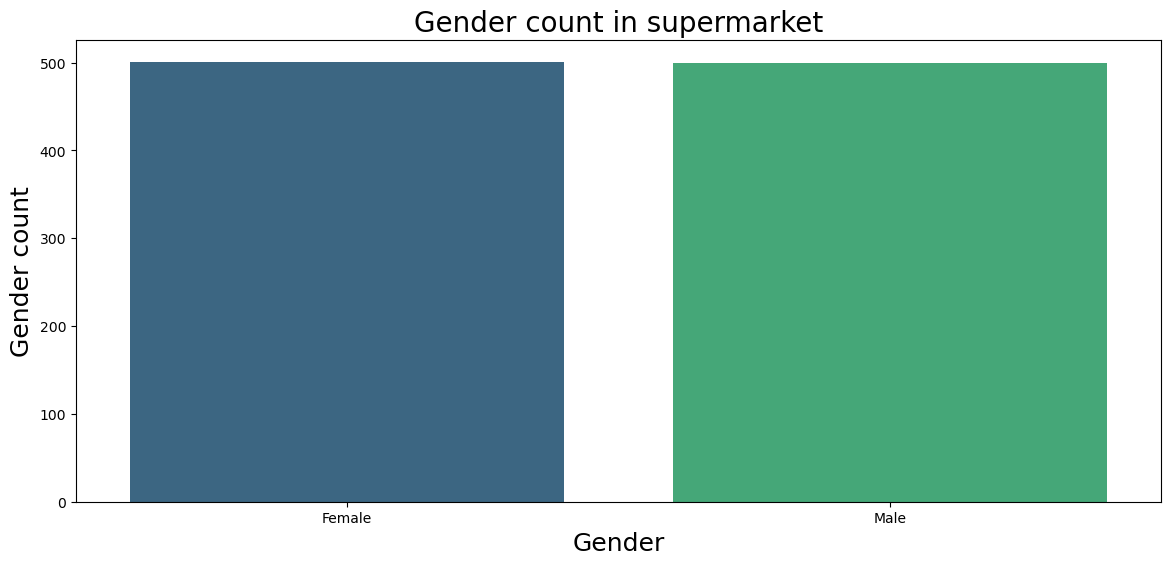

In [11]:
plt.figure(figsize=(14,6))

ax= sns.countplot(x = 'Gender', data = df1, palette = 'viridis')

ax.set_xlabel("Gender", fontsize = 18)
ax.set_ylabel("Gender count", fontsize = 18)
ax.set_title("Gender count in supermarket", fontsize = 20)

plt.show()

In [12]:
df1.groupby(['Gender']).agg({'Total':'sum'})

,Total
Gender,
Female,167882.925
Male,155083.824


<p style="font-size:20px;"> <i>Клиентская база достаточно сбалансирована по половому признаку, женщины составляют немного большую долю покупателей </i> </p>

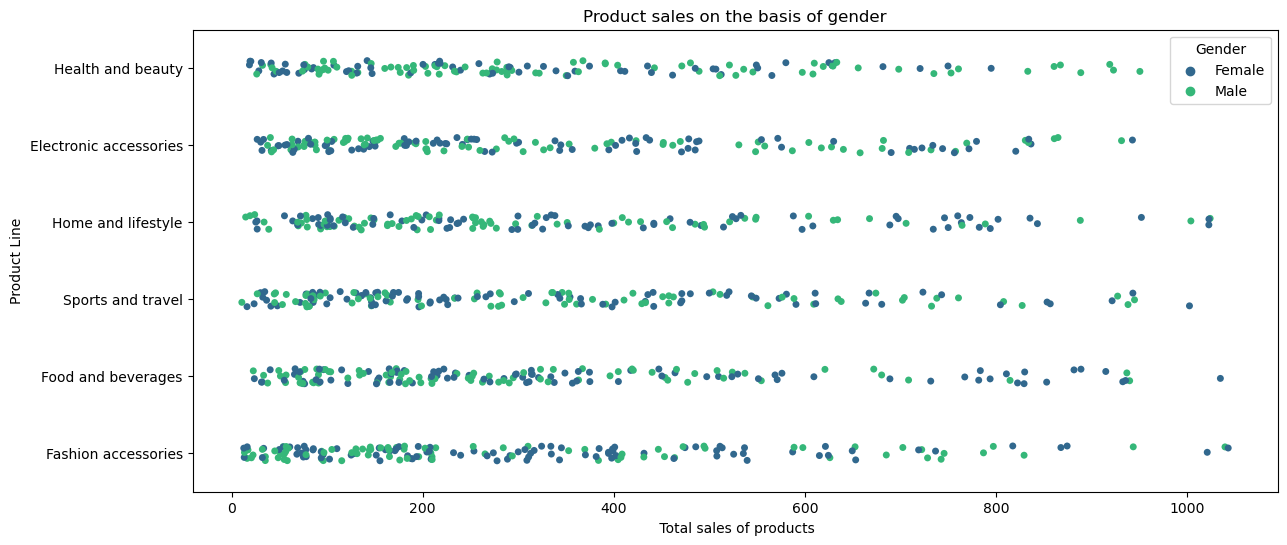

In [28]:
plt.figure(figsize = (14,6))

ax= sns.stripplot(y = "Product line",
                  x = "Total",
                  hue = "Gender",
                  data = df1,
                  palette='viridis')

ax.set_xlabel(xlabel = " Total sales of products")
ax.set_ylabel(ylabel = "Product Line")
ax.set_title(label = "Product sales on the basis of gender")

plt.show()

In [14]:
df2 = df1.copy()

df2['Male'] = (df1['Gender'] == 'Male').astype(int)
df2['Female'] = (df1['Gender'] == 'Female').astype(int)

gender_purchases = df2.groupby(['Product line', 'Gender']).size().reset_index(name='Count')

pivot_table = gender_purchases.pivot_table(index = 'Product line',
                                           columns = 'Gender',
                                           values = 'Count',
                                           fill_value = 0)

pivot_table.columns = ['Male', 'Female']

pivot_table

,Male,Female
Product line,,
Electronic accessories,84,86
Fashion accessories,96,82
Food and beverages,90,84
Health and beauty,64,88
Home and lifestyle,79,81
Sports and travel,88,78


<i> <p style="font-size:20px;"> В покупках в разделе " Мода " и " Спорт " явно преобладают мужчины  
В покупках в разделе " Здоровье и уход " явно преобладают женщины  
В других разделах соотношение покупок примерно равно </i> </p>

### <i> Анализируем количество зарегистрированных и незарегистрированных клиентов </i>

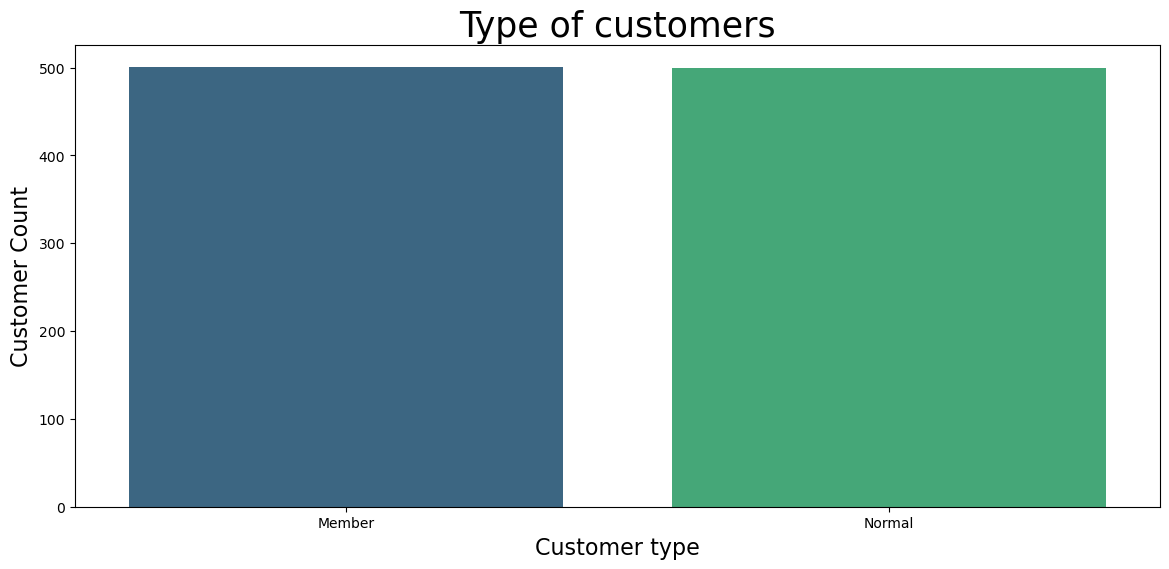

In [15]:
plt.figure(figsize= (14,6))

ax = sns.countplot(x = "Customer type", data = df1, palette = 'viridis')

ax.set_xlabel("Customer type", fontsize = 16)
ax.set_ylabel("Customer Count", fontsize = 16)
ax.set_title("Type of customers", fontsize = 25)

plt.show()

In [16]:
df1.groupby(['Customer type']).agg({'Total':'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


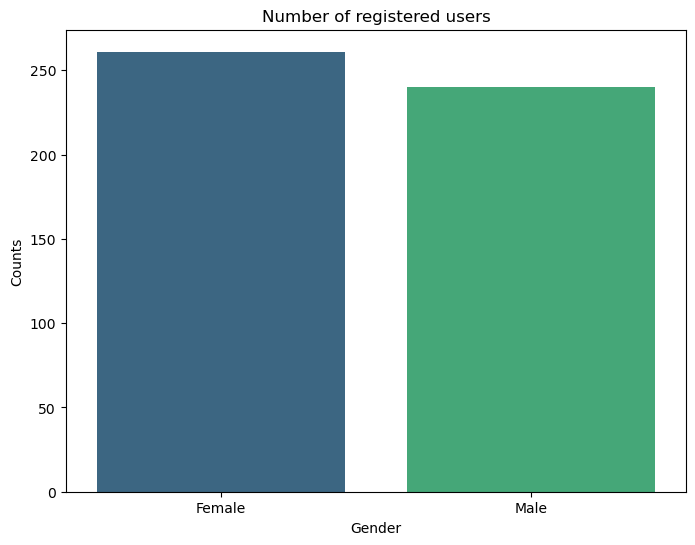

In [17]:
registered_customers = df1[df1['Customer type'] == 'Member']

gender_counts = registered_customers['Gender'].value_counts()

plt.figure(figsize=(8, 6))

sns.barplot(x = gender_counts.index,
            y = gender_counts.values,
            palette = 'viridis')

plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Number of registered users')

plt.show()

<i> <p style="font-size:20px;"> Чтобы стимулировать регистрацию среди мужчин, можно предложить эксклюзивные скидки на товары категорий "Мода" и "Спорт" при подписке на программу лояльности </i> </p>

### <i> Рассмотрим распределение покупок по времени суток и выявляем активность различных групп покупателей</i>

In [18]:
df1['Time'] = pd.to_datetime(df1['Time'])
df1['Hour'] = (df1['Time']).dt.hour

df1.head()

/var/folders/dr/4w138p_d2pbd6j7xvx5j5x5c0000gn/T/ipykernel_8606/2946003578.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Time'] = pd.to_datetime(df1['Time'])


,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour
0,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,2024-06-17 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,2024-06-17 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,2024-06-17 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13
3,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,2024-06-17 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20
4,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,2024-06-17 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10


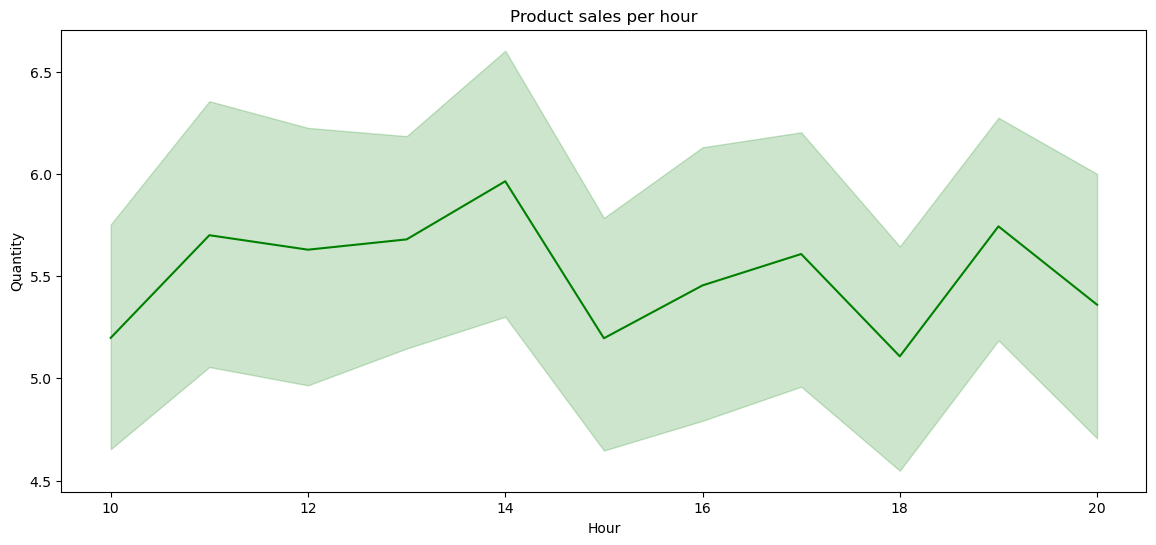

In [29]:
plt.figure(figsize=(14,6)) 

SalesTime = sns.lineplot(x = "Hour",
                         y = "Quantity",
                         data = df1,
                         color = "green").set_title("Product sales per hour")

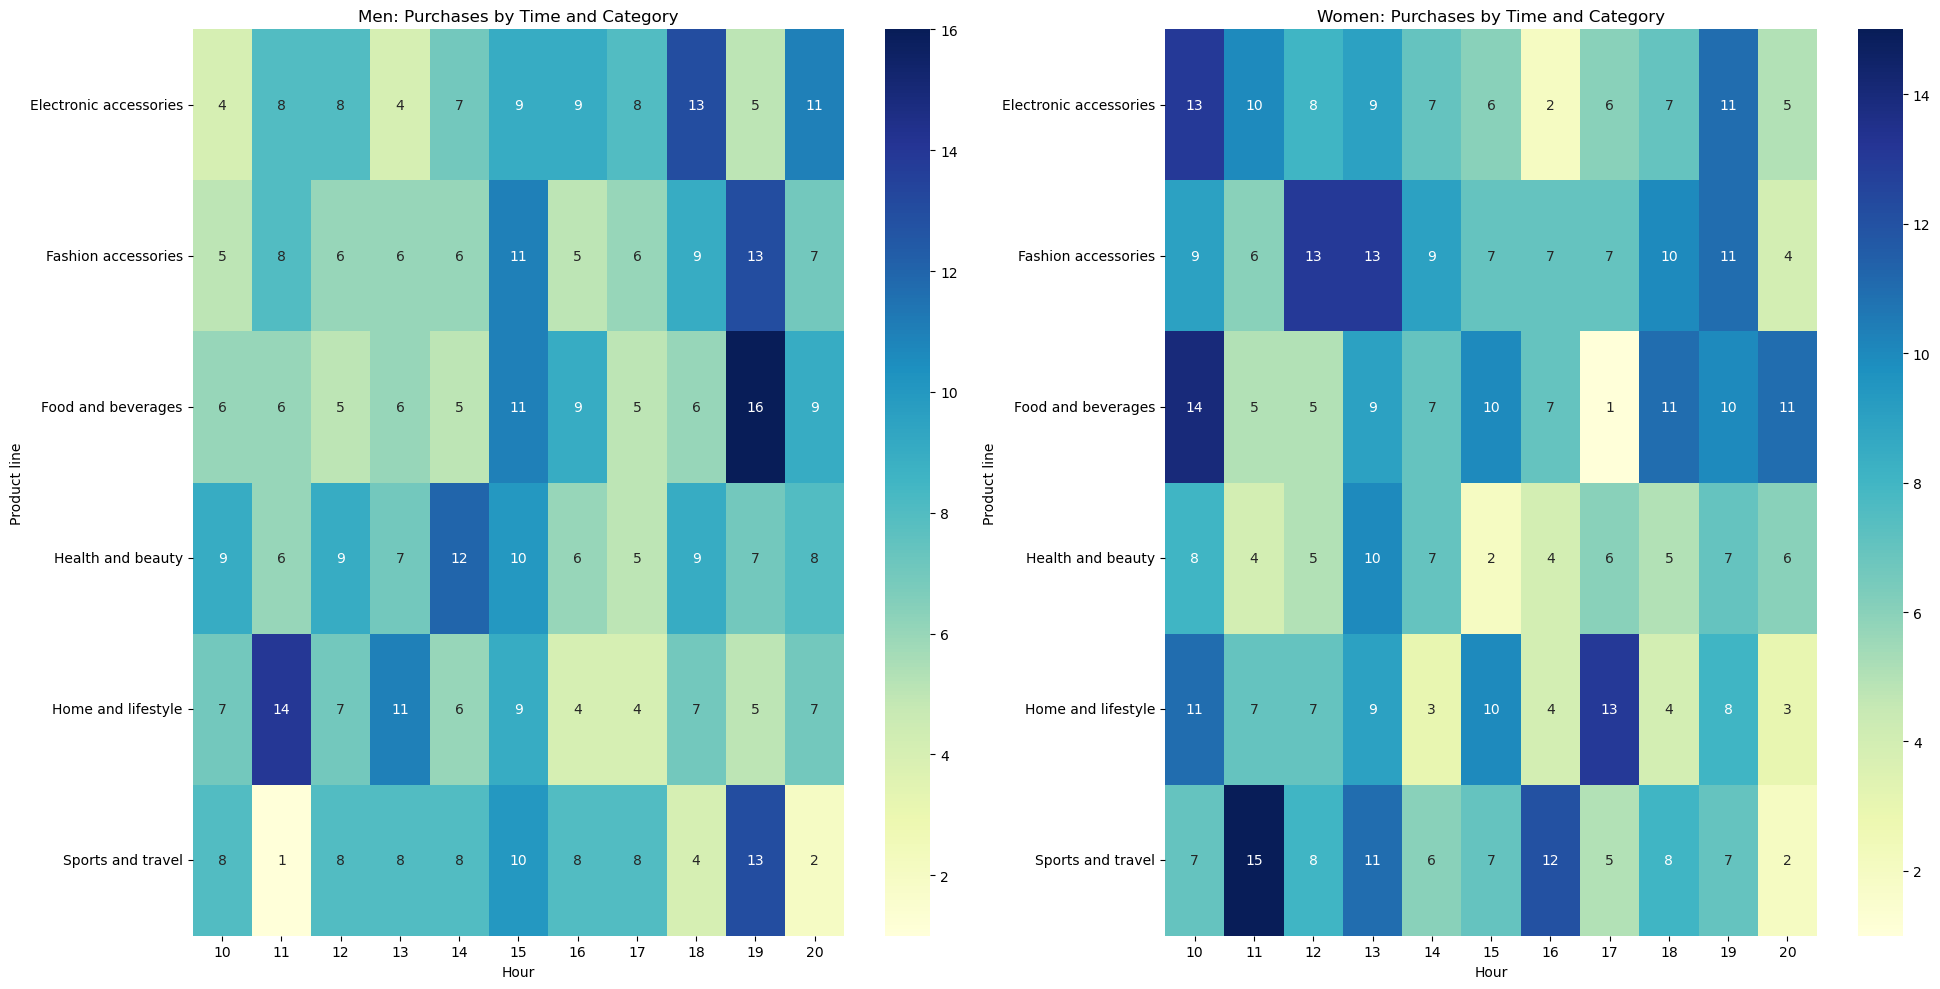

In [20]:
grouped_data = df1.groupby(['Gender', 'Product line', 'Hour']).size().reset_index(name = 'Purchase Count')

pivot_male = grouped_data[grouped_data['Gender'] == 'Male'].pivot(index = "Product line",
                                                                  columns = "Hour",
                                                                  values = "Purchase Count")

pivot_female = grouped_data[grouped_data['Gender'] == 'Female'].pivot(index = "Product line",
                                                                      columns = "Hour",
                                                                      values = "Purchase Count")

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.heatmap(pivot_male,
            cmap = "YlGnBu",
            annot = True,
            fmt = ".0f")
plt.title('Men: Purchases by Time and Category')

plt.subplot(1, 2, 2)
sns.heatmap(pivot_female,
            cmap = "YlGnBu",
            annot = True,
            fmt = ".0f")
plt.title('Women: Purchases by Time and Category')

plt.tight_layout()
plt.show()

<i> <p style="font-size:20px;"> Данные указывают на пиковую активность мужчин в покупке товаров для здоровья в 14:00 и переключение интереса на продукты питания к 19:00.  
Женщины в это же время предпочитают аксессуары, а к 19:00 переключают интерес на продукты питания.  
Это открывает возможности для целевых акций по увеличению продаж в соответствующих категориях в наиболее активные часы. </i> </p>

### <i> Рассмотрим способы оплаты у клиентов </i>

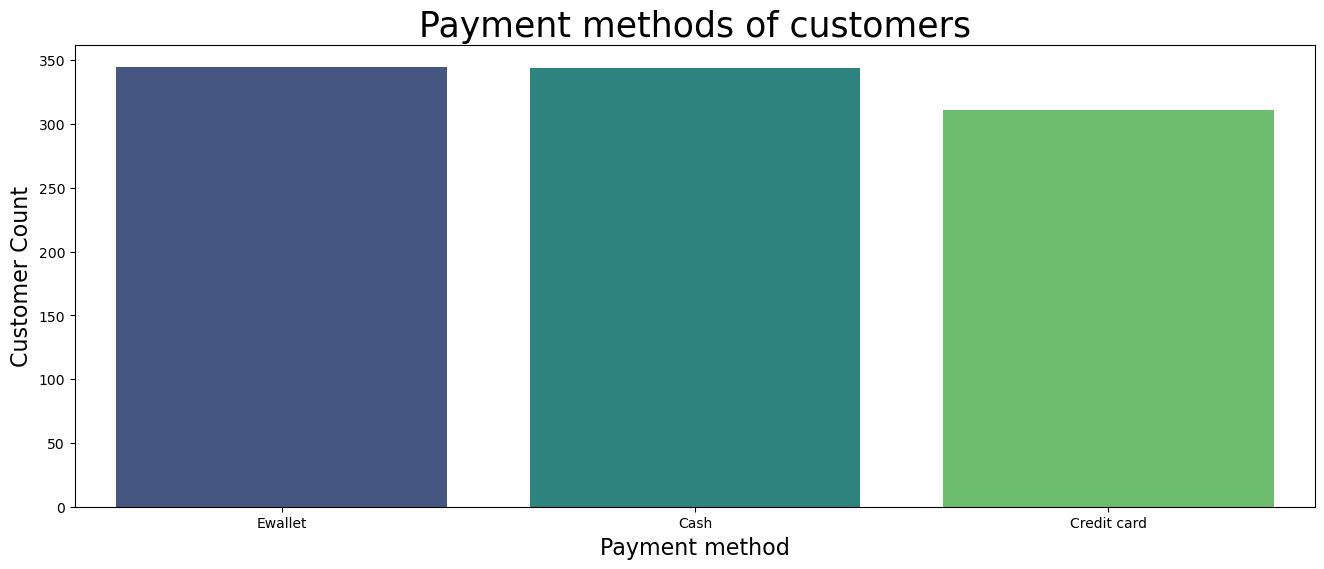

In [21]:
plt.figure(figsize = (16,6))

ax = sns.countplot(x = "Payment", data = df1, palette = 'viridis')

ax.set_xlabel("Payment method", fontsize = 16)
ax.set_ylabel("Customer Count", fontsize = 16)
ax.set_title("Payment methods of customers", fontsize= 25)

plt.show()

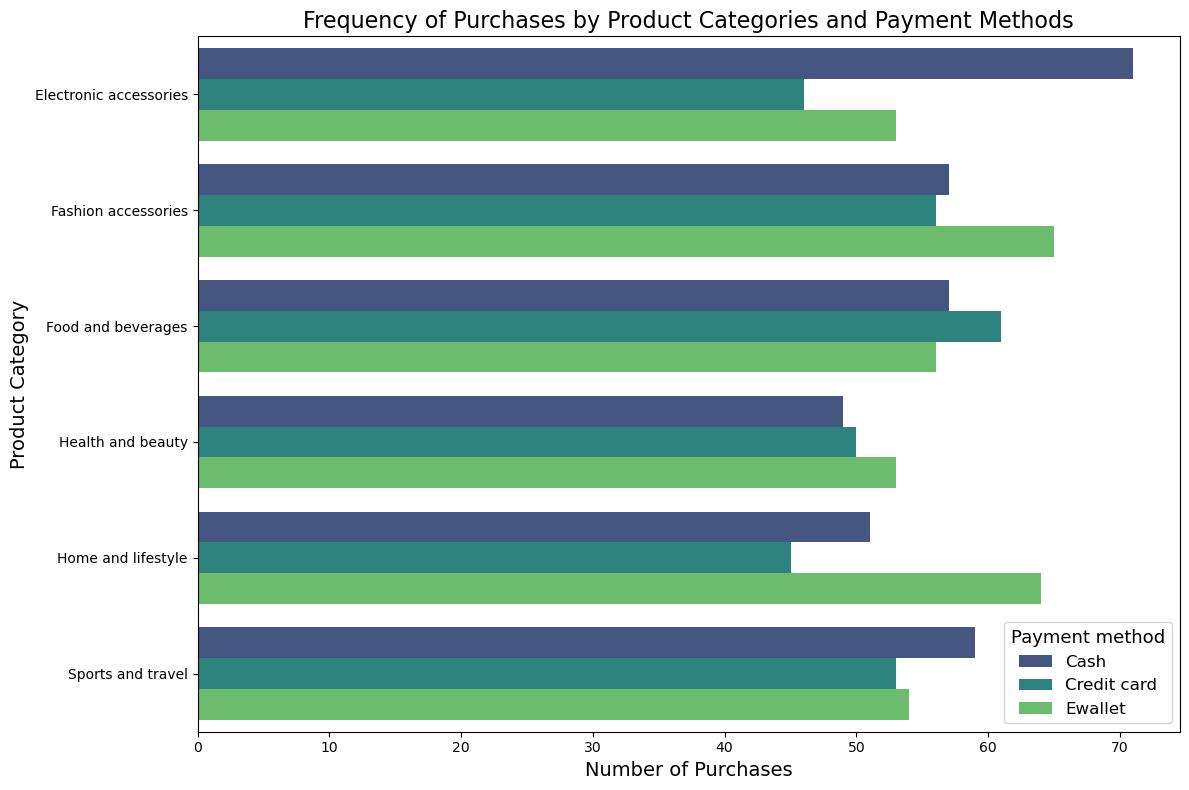

In [31]:
product_payment_data = df1.groupby(['Product line', 'Payment']).size().reset_index(name = 'Count')

plt.figure(figsize=(12, 8))

sns.barplot(x = 'Count',
            y = 'Product line',
            hue = 'Payment',
            data = product_payment_data,
            palette = 'viridis')

plt.xlabel('Number of Purchases', fontsize = 14)
plt.ylabel('Product Category', fontsize = 14)
plt.title('Frequency of Purchases by Product Categories and Payment Methods', fontsize=16)

plt.legend(title = 'Payment method', title_fontsize = '13', fontsize = '12')

plt.tight_layout()
plt.show()

<i> <p style="font-size:20px;"> Исходя из данных, бизнес может инвестировать в технологии POS-терминалов, которые ускоряют и упрощают процесс оплаты кредитными картами, чтобы улучшить общий опыт покупателя и уменьшить время ожидания в очередях </i> </p>

### <i> Рассмотрим спрос на продукты</i>

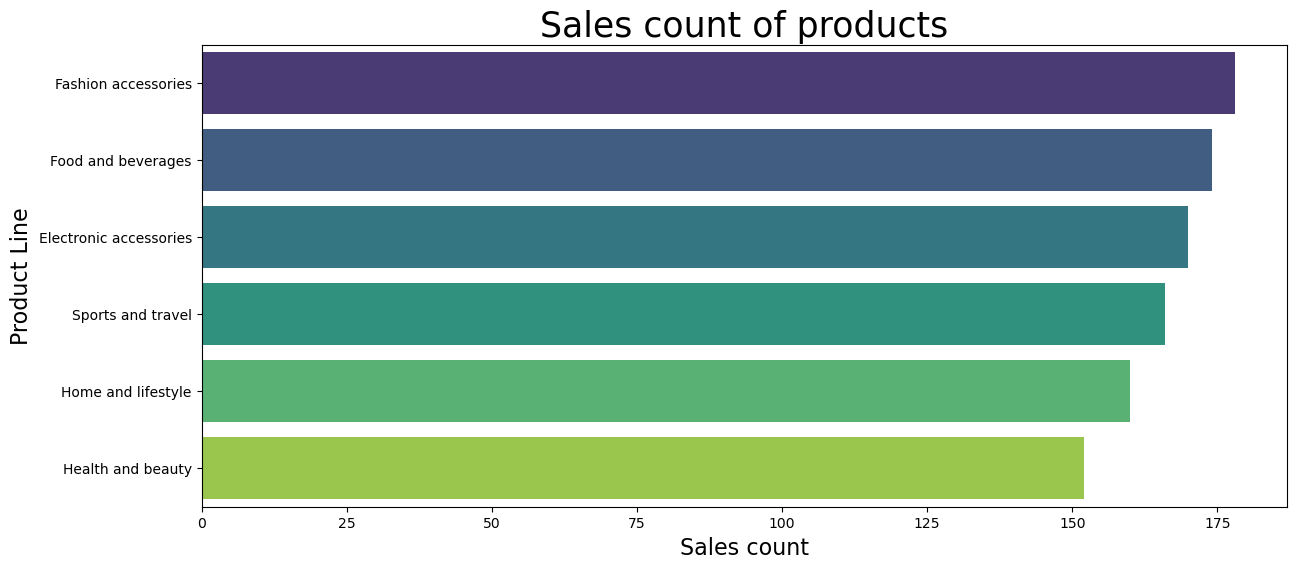

In [30]:
plt.figure(figsize=(14,6))

ax = sns.countplot(y = 'Product line',
                   data = df1,
                   order = df1['Product line'].value_counts().index,
                   palette = 'viridis')

ax.set_xlabel("Sales count", fontsize = 16)
ax.set_ylabel("Product Line", fontsize = 16)
ax.set_title("Sales count of products", fontsize = 25)

plt.show()

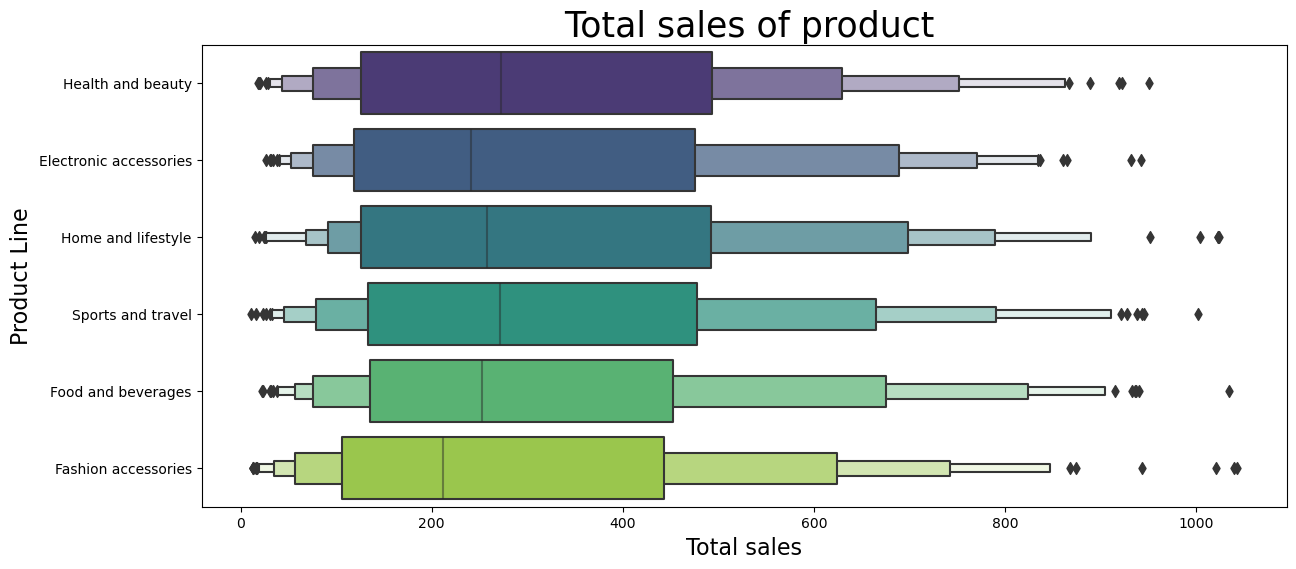

In [24]:
plt.figure(figsize=(14,6))

ax = sns.boxenplot(y = "Product line",
                   x = "Total",
                   data = df1,
                   palette = "viridis")

ax.set_xlabel("Total sales", fontsize = 16)
ax.set_ylabel("Product Line", fontsize = 16)
ax.set_title(" Total sales of product", fontsize = 25)

plt.show()

<i> <p style="font-size:20px;"> Мода и аксессуары пользуются наивысшим спросом среди покупателей, в то время как товары для здоровья и красоты оказываются на последнем месте по популярности. При этом средний чек на товары для здоровья и красоты является наивысшим среди всех представленных видов товара, а на моду и аксессуары тратят в среднем наименьший чек.  
    
 <i> <p style="font-size:18px;">Это может указывать на то, что <span style="color:green">покупатели склонны покупать модные аксессуары более импульсивно или выбирают товары более низкой ценовой категории.</span>  
    
<i> <p style="font-size:18px;">В то же время, товары для <span style="color:green">здоровья и красоты</span> могут быть менее востребованы по количеству продаж, но при этом обладают более высоким средним чеком, что может говорить о том, что <span style="color:green">покупатели склонны приобретать их в большем количестве за одну покупку.</span></i> </p>

### <i> Определяем какие товары приносят больше выручки для компании </i>

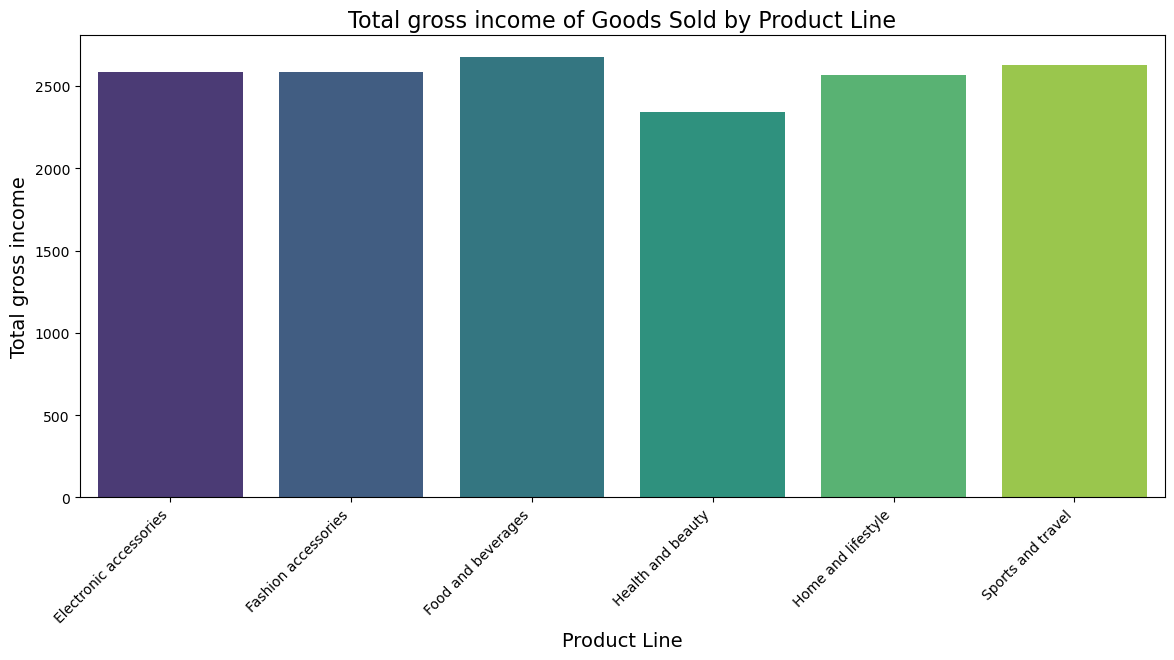

In [32]:
profit_per_product_line = df1.groupby('Product line')['gross income'].sum().reset_index()

plt.figure(figsize=(14,6))
ax = sns.barplot(x = 'Product line',
                 y = 'gross income',
                 data = profit_per_product_line,
                 palette = 'viridis')

ax.set_xlabel("Product Line", fontsize = 14)
ax.set_ylabel("Total gross income", fontsize = 14)

ax.set_title("Total gross income of Goods Sold by Product Line", fontsize = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

plt.show()

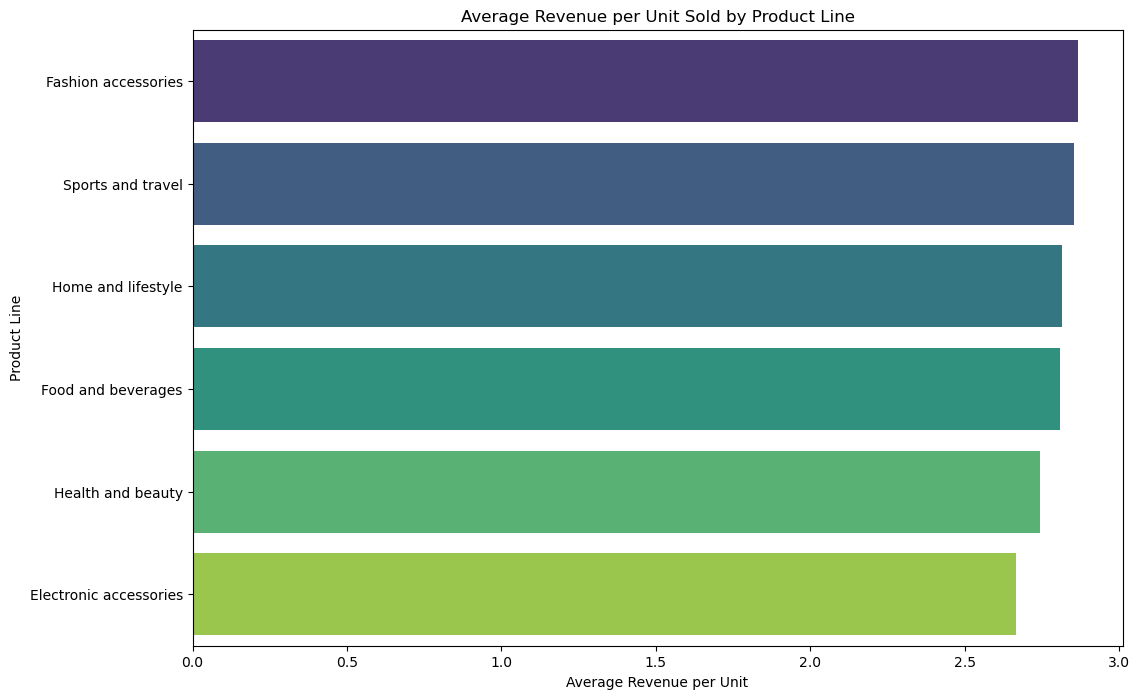

In [33]:
product_sales_summary = df1.groupby('Product line').agg({'gross income': 'sum', 'Quantity': 'sum'}).reset_index()

product_sales_summary['Average Revenue per Unit'] = product_sales_summary['gross income'] / product_sales_summary['Quantity']

product_sales_summary = product_sales_summary.sort_values('Average Revenue per Unit', ascending = False)

plt.figure(figsize=(12, 8))

sns.barplot(x = 'Average Revenue per Unit',
            y = 'Product line',
            data = product_sales_summary,
            palette = 'viridis')

plt.xlabel('Average Revenue per Unit')
plt.ylabel('Product Line')
plt.title('Average Revenue per Unit Sold by Product Line')

plt.show()

<i> <p style="font-size:20px;"> Стоит рассмотреть возможность оптимизации ассортимента в категориях с низкой поштучной прибылью, сосредоточив внимание на товарах с высокой маржинальностью и высоким спросом.  
    
<i> <p style="font-size:20px;"> Это может включать в себя сокращение ассортимента менее прибыльных товаров и акцент на продвижении более выгодных для бизнеса позиций.

### <i> Рассмотрим распределения оценок среди категорий товаров</i>

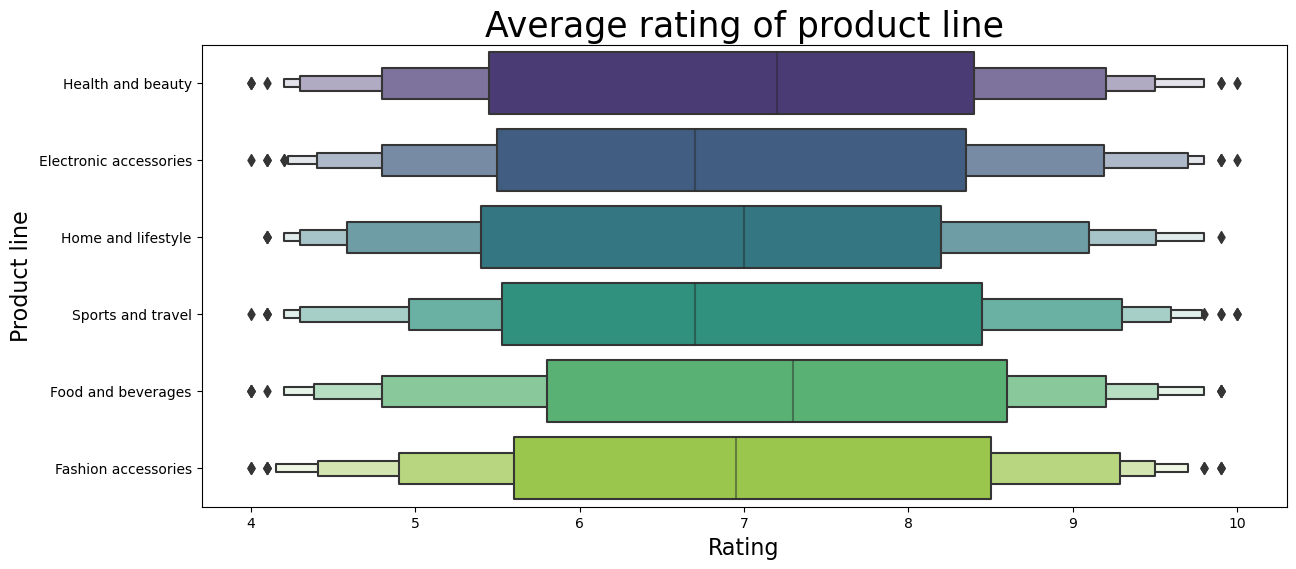

In [27]:
plt.figure(figsize = (14,6))

ax = sns.boxenplot(y = "Product line",
                   x = "Rating",
                   data = df1,
                   palette = 'viridis')

ax.set_xlabel("Rating", fontsize = 16)
ax.set_ylabel("Product line", fontsize = 16)
ax.set_title("Average rating of product line", fontsize = 25)

plt.show()

<i> <p style="font-size:20px;">Стоит усилить маркетинг и диверсификацию продуктов в категории "Еда" для увеличения прибыли, исходя из высокой клиентской удовлетворенности.  

<i> <p style="font-size:20px;">В сегменте "Электроника" сосредоточиться на повышении качества послепродажного сервиса для улучшения рейтингов и лояльности покупателей.

## <u>Вывод</u>

<p style="font-size:21px;">Анализ выявил ключевые инсайты о предпочтениях различных групп покупателей и их покупательском поведении в разное время суток, а также об их чувствительности к ценовой политике в различных категориях товаров.

<p style="font-size:21px;"> <u>Для максимизации прибыли и улучшения пользовательского опыта стоит проработать:</u>

<p style="font-size:18px;"> <u>1. Целевые маркетинговые кампании:</u>
<p style="font-size:18px;"> <i>Разработать и реализовать целевые маркетинговые кампании и акции, ориентированные на <span style="color:green">мужчин</span> и <span style="color:darkblue">женщин</span> в соответствии с их предпочтениями в категориях <span style="color:green">"Мода", "Спорт"</span> и <span style="color:darkblue">"Здоровье и уход"</span>. Это позволит нам увеличить продажи в этих категориях, предлагая клиентам именно то, что они ищут, в наиболее активные часы покупок.</i>

<p style="font-size:18px;"> <u>2. Оптимизация ассортимента:</u> 
<p style="font-size:18px;"><i>Рассмотреть возможности для оптимизации ассортимента, особенно в категориях с низкой поштучной прибылью, фокусируясь на товарах с высокой маржинальностью и высоким спросом. Это поможет увеличить средний чек и общую прибыльность.</i>

<p style="font-size:18px;"> <u>3. Улучшение послепродажного обслуживания:</u>
<p style="font-size:18px;"><i>Инвестировать в улучшение качества послепродажного обслуживания и поддержки клиентов, особенно в категории "Электроника", для повышения удовлетворенности клиентов и их лояльности.</i>

<p style="font-size:18px;"> <u>4. Инвестиции в технологии:</u>
<p style="font-size:18px;"><i>Инвестировать в технологии POS-терминалов для ускорения и упрощения процесса оплаты, что повысит удовлетворенность клиентов и сократит время ожидания в очередях.</i>

<p style="font-size:21px;">Реализация этих стратегий позволит не только увеличить продажи и прибыль, но и значительно улучшить покупательский опыт, что, в свою очередь, приведет к повышению лояльности клиентов и укреплению бренда на рынке.